# Step 1: Load the Data and answering the question

In [193]:
!wget https://raw.githubusercontent.com/hazmash5/ds-projects/main/Proj_04_Wheat/%20WheatDataset.ipynb 

--2021-01-27 19:22:52--  https://raw.githubusercontent.com/hazmash5/ds-projects/main/Proj_04_Wheat/%20WheatDataset.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4519 (4.4K) [text/plain]
Saving to: ‘ WheatDataset.ipynb’

 WheatDataset.ipynb 100%[===================>]   4.41K  --.-KB/s    in 0s      

2021-01-27 19:22:52 (45.9 MB/s) - ‘ WheatDataset.ipynb’ saved [4519/4519]



In [3]:
# Get the dataset by raw URL
!wget https://raw.githubusercontent.com/alhaol/ds-projects/main/Proj_04_Wheat/data/seeds_dataset.txt

--2021-01-27 17:56:47--  https://raw.githubusercontent.com/alhaol/ds-projects/main/Proj_04_Wheat/data/seeds_dataset.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [text/plain]
Saving to: ‘seeds_dataset.txt’

seeds_dataset.txt   100%[===================>]   9.08K  --.-KB/s    in 0s      

2021-01-27 17:56:47 (73.6 MB/s) - ‘seeds_dataset.txt’ saved [9300/9300]



In [4]:
# Create new folder and name it data
!mkdir data

In [5]:
# Moving our datasets to the data folder
!mv seeds_dataset.txt data/

In [ ]:
# Showing the number of lines.
!cat data/seeds_dataset.txt | wc -l

209


We have ***210*** instances

In [200]:
# Showing the data
!head -n 2 data/seeds_dataset.txt

15.26	14.84	0.871	5.763	3.312	2.221	5.22	1
14.88	14.57	0.8811	5.554	3.333	1.018	4.956	1


> There is no header, We have 7 attributes and only one target columns.

# Step 2: Exploratory analysis and Check data for problems 

In [7]:
import pandas as pd
import numpy as np
 
%matplotlib inline
 
import matplotlib.pyplot as plt
import seaborn as sb

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import SVC
from xgboost import XGBClassifier


models_2 = []
models_2.append(('LDA ', LinearDiscriminantAnalysis()))
models_2.append(('LR  ', LogisticRegression()))
models_2.append(('RC  ', RidgeClassifier()))
models_2.append(('LSVC', LinearSVC()))
models_2.append(('SGDC', SGDClassifier()))
models_2.append(('P   ', Perceptron()))
models_2.append(('PAC ', PassiveAggressiveClassifier()))
models_2.append(('NC  ', NearestCentroid()))
models_2.append(('SVM ', SVC()))
models_2.append(('XGB', XGBClassifier()))

In [12]:
df= pd.read_csv('/content/data/seeds_dataset.txt', header=None)
df.head(2)

,0
0,15.26\t14.84\t0.871\t5.763\t3.312\t2.221\t5.22\t1
1,14.88\t14.57\t0.8811\t5.554\t3.333\t1.018\t4.9...


The seperation is '\t', so we will use it.

In [16]:
df= pd.read_csv('/content/data/seeds_dataset.txt',sep='\t', header=None, error_bad_lines=False)
df.shape

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


(199, 8)

We have bad lines lost = 10 instances, it sounds like one of them click double tab. so we will use '\t+' as a sep

In [132]:
df= pd.read_csv('/content/data/seeds_dataset.txt',sep='\t+', header=None, error_bad_lines=False)
df.shape

(210, 8)

In [19]:
df.isnull().sum().sum()

0

There is no missing values as NaN until now. but another marking NaN values way may they used. 

In [20]:
df[7].value_counts()

3    70
2    70
1    70
Name: 7, dtype: int64

It is a **nominal** balanced classification problem (1, 2 and 3).

## using pie plot
I used pie plot to visualize and compute the difference between the categories

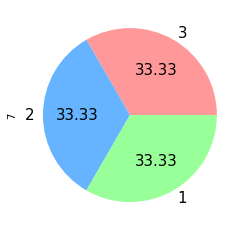

In [30]:
pd.value_counts(df[7]).plot(kind='pie', colors=['#ff9999','#66b3ff','#99ff99'], autopct='%.2f',fontsize=15)

## Using box plot
I used box plot to have an indication of how the values in the data are spread out, and to visualize the distribution of values within each attributes.

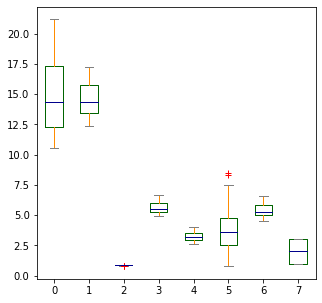

In [31]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
df.plot(kind='box', color=color, sym='r+',ax=ax)

The attributes box plotting shows the following: 

1. All attributes values spread between 0 and 200 except E attribute,

2. There is no negative values,

3. E attribute have a lot of outliers exceed 200,

4. Each attribute have own distribution, so we must use scalers methods before training.

## Using Andrews curves
I used andrews curves plotting to visualize data clustering for each class, Curves belonging to samples of the same class will usually be closer together and form larger structures.

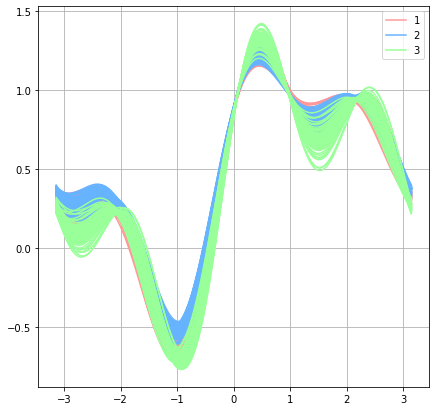

In [33]:
all_inputs = df[df.columns[:-1]].values
all_labels = df[7].values
from sklearn.preprocessing import Normalizer
sc = Normalizer()
all_inputs = sc.fit_transform(all_inputs)
ddf= pd.DataFrame(all_inputs)
ddf[7]= all_labels
fig = plt.figure(figsize = (7,7))
ax = fig.gca()
pd.plotting.andrews_curves(ddf, 7, color=['#ff9999','#66b3ff','#99ff99'],ax=ax)

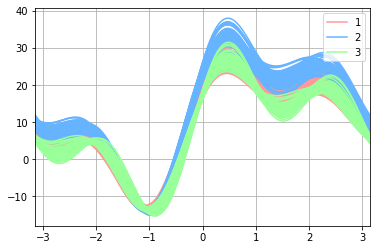

In [34]:
pd.plotting.andrews_curves(df, 7, color=['#ff9999','#66b3ff','#99ff99'])

It sounds two classes are similar.

## Using Parallel coordinates plotting
I used Parallel coordinates to comparing variables together and seeing the relationships between them.

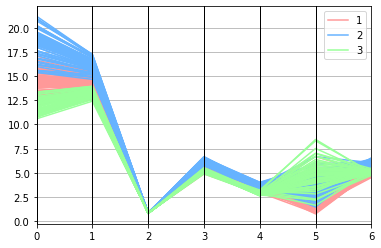

In [35]:
pd.plotting.parallel_coordinates(df, 7, color=['#ff9999','#66b3ff','#99ff99'])

It sounds the classes have different values at 0 and 1 attributes

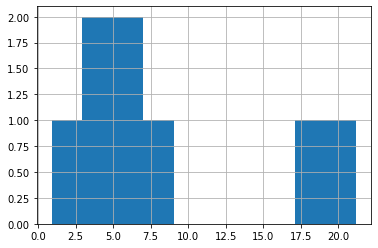

In [ ]:
df.describe().T['max'].hist()

In [39]:
(df == 0).sum().sum()

0

## Using Radviz Plot
I used radviz plotting to recognize distinguished cluster for each class

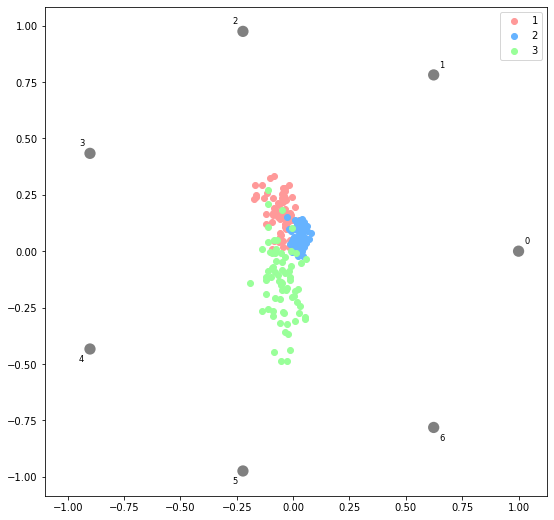

In [41]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df[7].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
all_inputs = sc.fit_transform(all_inputs)
ddf= pd.DataFrame(all_inputs)
ddf.columns= df.columns[0:-1]
plt.figure(figsize=(9, 9))
ddf[7]= all_labels
pd.plotting.radviz(ddf, 7, color=['#ff9999','#66b3ff','#99ff99'] )

It sounds there is a class distributed along the other two classes

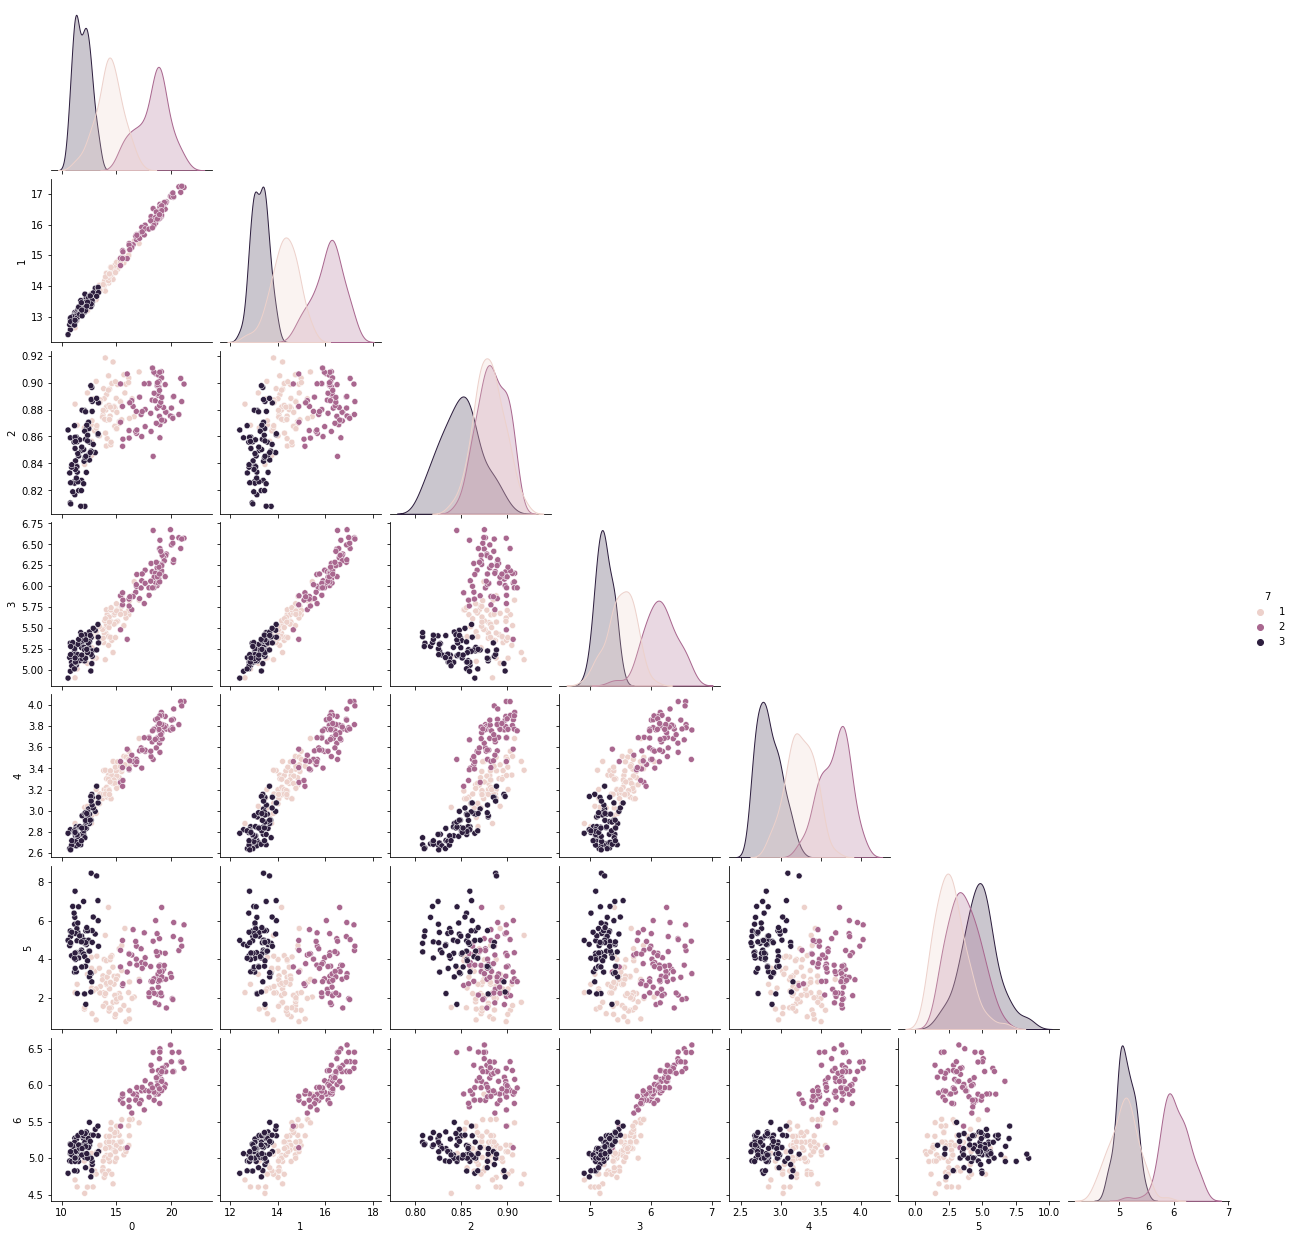

In [47]:
sb.pairplot(df, hue= 7, corner=True)

## Using hist plot

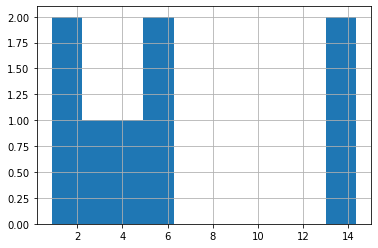

In [48]:
df.median().hist()

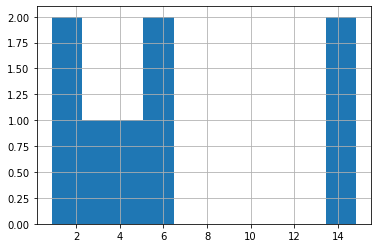

In [ ]:
df.describe().T['mean'].hist()

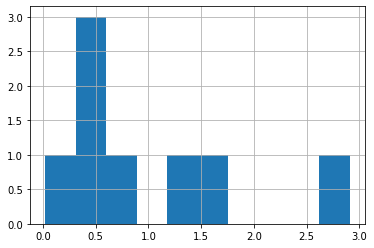

In [ ]:
df.describe().T['std'].hist()

The mode is the most frequent observation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6adbf29c88>,
      dtype=object)

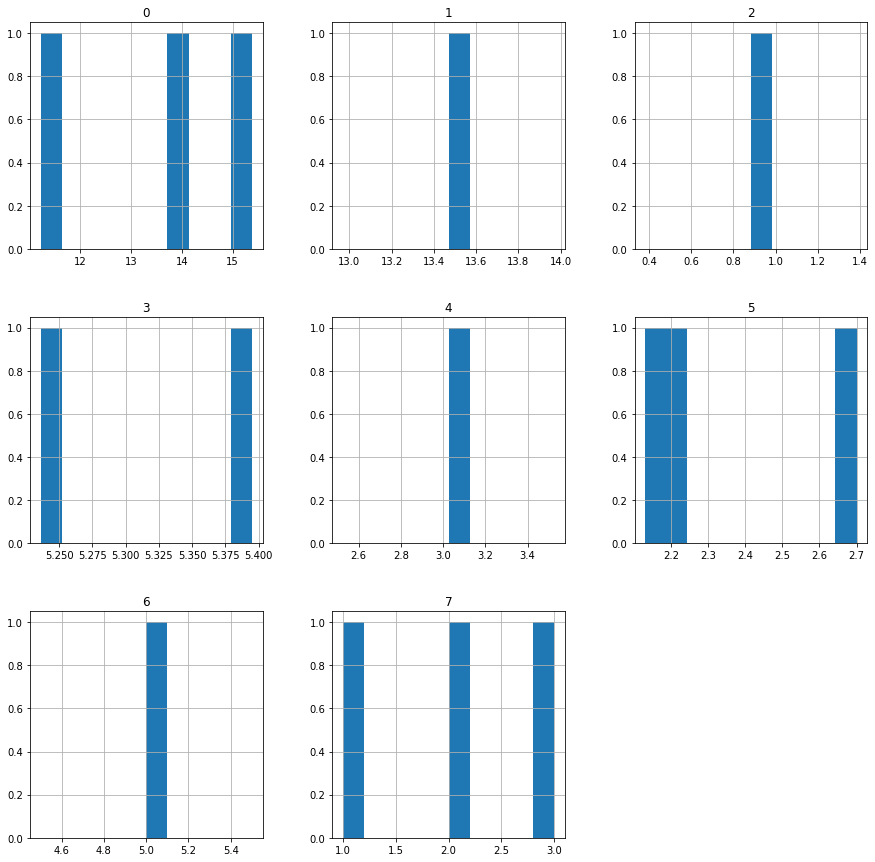

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.mode().hist(ax=ax)

## Using violinplot

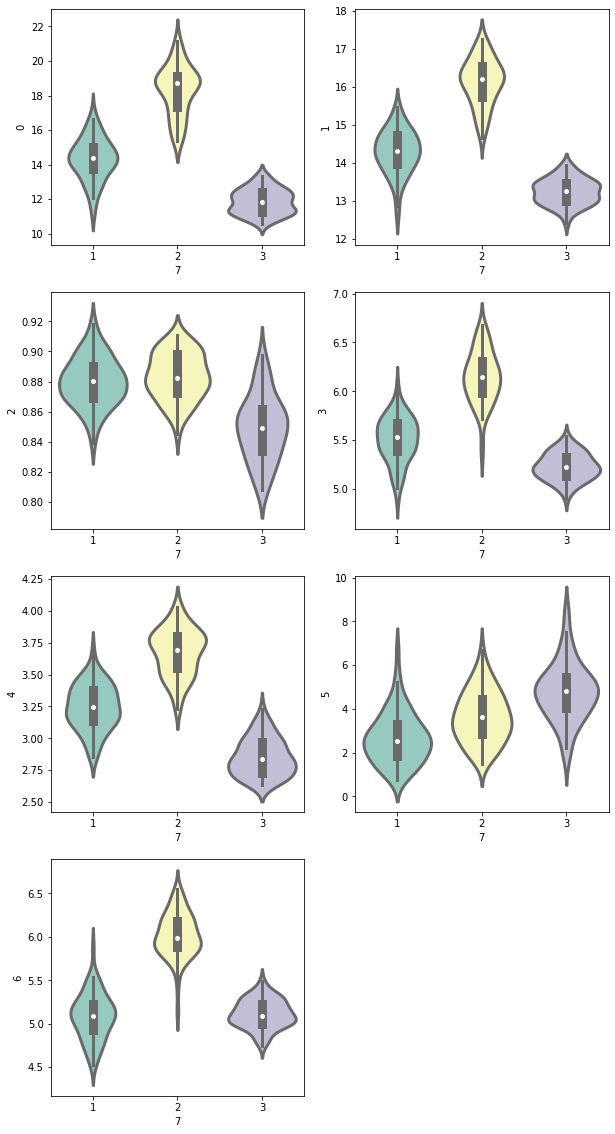

In [ ]:
plt.figure(figsize=(10, 20))
 
for column_index, column in enumerate(df):
    if column == 7:
        continue
    plt.subplot(4, 2, column_index + 1)
    sb.violinplot(x=7, y=column, data=df, inner="box", palette="Set3", cut=2, linewidth=3)

In [12]:
df[(df[7] == 2) & (df[6] < 5.5)]

,0,1,2,3,4,5,6,7
124,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
135,15.38,14.66,0.8990,5.477,3.465,3.600,5.439,2


Data Correlation

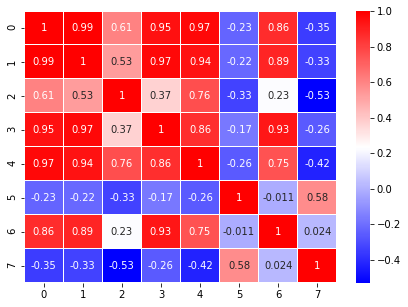

In [14]:
corrMatrix = df.corr()
plt.figure(figsize=(7, 5))
sb.heatmap(corrMatrix, annot=True, cmap='bwr', linewidths= .01 )
plt.show()

# Step 3: Tidying the data


# Feature Selection Methods Comparison

## **1.** Removing features with low variance

**VarianceThreshold** is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.*italicised text*

In [15]:
df.var()

0    8.466351
1    1.705528
2    0.000558
3    0.196305
4    0.142668
5    2.260684
6    0.241553
7    0.669856
dtype: float64

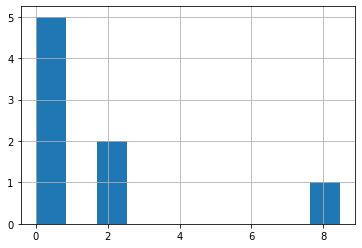

In [ ]:
df.var().hist()

In [57]:
all_inputs = df.dropna()[df.columns[0:-1]].values
all_labels = df.dropna()[7].values
all_inputs.shape

(210, 7)

In [58]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=.01 )
all_inputs = sel.fit_transform(all_inputs)
all_inputs.shape

(210, 6)

In [59]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
results_1 = []; names = []; seed=42
for name, model in models_2:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_1.append(cv_results_1)
    names.append(name)
    print(f"{name}, {cv_results_1.mean()}, {cv_results_1.std()}))")

LDA , 0.9482142857142858, 0.08746354925898897))
LR  , 0.9089285714285715, 0.09362661949227377))
RC  , 0.9482142857142858, 0.08746354925898897))
LSVC, 0.9473214285714286, 0.07895099067504745))
SGDC, 0.9473214285714286, 0.10156225470927993))
P   , 0.9223214285714286, 0.08753188194676759))
PAC , 0.9276785714285716, 0.0998204702228466))
NC  , 0.9080357142857144, 0.09654011405860767))
SVM , 0.9026785714285716, 0.10721351836596058))
XGB, 0.9214285714285715, 0.10433829398565388))


Univariate Feature Selection

## **2.** UFS SelectKBest Select K Best
it removes all but the highest scoring features

In [60]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df[7].values
all_inputs.shape

(210, 7)

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
all_inputs = SelectKBest(chi2, k=6).fit_transform(all_inputs, all_labels)
all_inputs.shape

(210, 6)

In [62]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
results_2 = []; names = []; seed=42
for name, model in models_2:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_2.append(cv_results_2)
    names.append(name)
    print(f"{name}, {cv_results_2.mean()}, {cv_results_2.std()}))")

LDA , 0.9482142857142858, 0.08746354925898897))
LR  , 0.9089285714285715, 0.09362661949227377))
RC  , 0.9482142857142858, 0.08746354925898897))
LSVC, 0.9473214285714286, 0.07895099067504745))
SGDC, 0.9205357142857145, 0.0995005063570338))
P   , 0.9223214285714286, 0.08753188194676759))
PAC , 0.9544642857142858, 0.08646896193173027))
NC  , 0.9080357142857144, 0.09654011405860767))
SVM , 0.9026785714285716, 0.10721351836596058))
XGB, 0.9214285714285715, 0.10433829398565388))


## **3.** `UFS `SelectFpr` False Positive Rate test.
Filter: Select the p values below alpha based on a FPR test. a smaller p-value bears more significance as it can tell you that the hypothesis may not explain the observation fairly. If one or more of these probabilities turn out to be less than or equal to α, the level of significance, we reject the null hypothesis. For a true null hypothesis, p can take on any value between 0 and 1 with equal likeliness. For a true alternative hypothesis, p-values likely fall closer to 0.

In [63]:
all_inputs = df.dropna()[df.columns[0:-1]].values
all_labels = df.dropna()[7].values
all_inputs.shape

(210, 7)

In [64]:
from sklearn.feature_selection import SelectFpr, chi2
all_inputs = SelectFpr(chi2, alpha= 0.1
                       ).fit_transform(all_inputs, all_labels)
all_inputs.shape

(210, 6)

In [68]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
results_3 = []; names = []; seed=42
for name, model in models_2:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_3.append(cv_results_3)
    names.append(name)
    print(f"{name}, {cv_results_3.mean()}, {cv_results_3.std()}))")

LDA , 0.9482142857142858, 0.08746354925898897))
LR  , 0.9089285714285715, 0.09362661949227377))
RC  , 0.9482142857142858, 0.08746354925898897))
LSVC, 0.9473214285714286, 0.07895099067504745))
SGDC, 0.9339285714285716, 0.10994838770615818))
P   , 0.9223214285714286, 0.08753188194676759))
PAC , 0.9330357142857144, 0.1104944534114445))
NC  , 0.9080357142857144, 0.09654011405860767))
SVM , 0.9026785714285716, 0.10721351836596058))
XGB, 0.9214285714285715, 0.10433829398565388))


## **4.** Feature selection using SelectFromModel
### L1-based feature selection
Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with SelectFromModel to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the Lasso for regression, and of LogisticRegression and LinearSVC for classification:

In [90]:
all_inputs = df[df.columns[0:-1]].values
all_labels = df[7].values
all_inputs.shape

(210, 7)

In [91]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=.07, penalty="l1", dual=False).fit(all_inputs, all_labels)
model = SelectFromModel(lsvc, prefit=True)
all_inputs = model.transform(all_inputs)
all_inputs.shape

(210, 6)

In [92]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
results_4 = []; names = []; seed=42
for name, model in models_2:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_4 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results_4.append(cv_results_4)
    names.append(name)
    print(f"{name}, {cv_results_4.mean()}, {cv_results_4.std()}))")

LDA , 0.9482142857142858, 0.08746354925898897))
LR  , 0.9089285714285715, 0.09362661949227377))
RC  , 0.9482142857142858, 0.08746354925898897))
LSVC, 0.9473214285714286, 0.07895099067504745))
SGDC, 0.9410714285714287, 0.08876634658311834))
P   , 0.9223214285714286, 0.08753188194676759))
PAC , 0.9535714285714286, 0.08737235587660762))
NC  , 0.9080357142857144, 0.09654011405860767))
SVM , 0.9026785714285716, 0.10721351836596058))
XGB, 0.9214285714285715, 0.10433829398565388))


## **5.** Sequential Feature Selection 
(Selecting features based on importance)
The features with the highest absolute coef_ value are considered the most important. 

In [146]:
all_inputs = df.dropna()[df.columns[0:-1]].values
all_labels = df.dropna()[7].values
all_inputs.shape

(210, 7)

Feature importance from coefficients

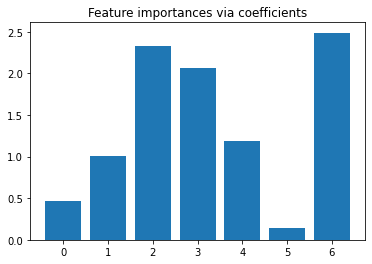

In [147]:
from sklearn.linear_model import LassoCV
 
lasso = LassoCV().fit(all_inputs, all_labels)
importance = np.abs(lasso.coef_)
feature_names = np.array(all_labels)
plt.bar(height=importance, x=df.columns[0:-1])
plt.title("Feature importances via coefficients")
plt.show()

In [136]:
np.sort(importance)

array([0.1463261 , 0.46729653, 1.00946259, 1.18886432, 2.0653016 ,
       2.3266357 , 2.48854274])

In [148]:
from sklearn.feature_selection import SelectFromModel
 
 
threshold = np.sort(importance)[-6] 
 
 
sfm = SelectFromModel(lasso, threshold=threshold).fit(all_inputs, all_labels)
selected_Features = df.columns[:-1][sfm.get_support()]
print("Features selected by SelectFromModel: ",
      f"{df.columns[0:-1][sfm.get_support()]}")

Features selected by SelectFromModel:  Int64Index([0, 1, 2, 3, 4, 6], dtype='int64')


In [149]:
all_inputs = df.dropna()[selected_Features].values
all_labels = df.dropna()[7].values
all_inputs.shape

(210, 6)

In [150]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
results_5 = []
names = []
seed=42
for name, model in models_2:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_5 = cross_val_score(model, X_train, y_train, cv=kfold,          scoring='accuracy')
    results_5.append(cv_results_5)
    names.append(name)
    print(f"{name}, {cv_results_5.mean()}, {cv_results_5.std()}))")

LDA , 0.9339285714285716, 0.10994838770615818))
LR  , 0.8955357142857144, 0.12929792266746767))
RC  , 0.9330357142857144, 0.11937269604572265))
LSVC, 0.9267857142857144, 0.11897468003653516))
SGDC, 0.9151785714285715, 0.12763485765164273))
P   , 0.8821428571428573, 0.1524042020953705))
PAC , 0.9071428571428573, 0.12263060509563853))
NC  , 0.8383928571428572, 0.1475215091546494))
SVM , 0.8892857142857145, 0.1443670209386267))
XGB, 0.9017857142857144, 0.09440671348490216))


##  **6.** Principal Component Analysis

In [173]:
all_inputs = df.dropna()[df.columns[0:-1]].values
all_labels = df.dropna()[7].values

In [152]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(all_inputs)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [153]:
print(pca.explained_variance_)

[1.07933269e+01 2.12945512e+00 7.36300330e-02 1.28874947e-02
 2.74822668e-03]


In [174]:
all_inputs = pca.transform(all_inputs)
all_inputs.shape

(210, 5)

In [155]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [156]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

results_6 = []
names = []
seed=42
for name, model in models_2:
    kfold = KFold(n_splits=20, random_state=seed, shuffle=True)
    cv_results_6 = cross_val_score(model, X_train, y_train, cv=kfold,          scoring='accuracy')
    results_6.append(cv_results_6)
    names.append(name)
    print(f"{name}, {cv_results_6.mean()}, {cv_results_6.std()}))")

LDA , 0.9464285714285715, 0.09990429093356688))
LR  , 0.9544642857142858, 0.08646896193173027))
RC  , 0.9473214285714286, 0.08829359505972915))
LSVC, 0.9544642857142858, 0.08646896193173027))
SGDC, 0.9678571428571429, 0.06837210613955948))
P   , 0.9348214285714287, 0.09719848066125901))
PAC , 0.9607142857142857, 0.07525466966323385))
NC  , 0.9473214285714286, 0.08829359505972915))
SVM , 0.9276785714285716, 0.0998204702228466))
XGB, 0.9205357142857145, 0.0995005063570338))


## Classification Comparison of Feature Selection Methods

In [157]:
classification_comparison= pd.DataFrame(index=[i for i in names])

In [158]:
dfresults = pd.DataFrame(results_1)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy']= df_mean
classification_comparison['sd']= df_sd


In [159]:
dfresults = pd.DataFrame(results_2)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_2']= df_mean
classification_comparison['sd_2']= df_sd

In [160]:
dfresults = pd.DataFrame(results_3)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_3']= df_mean
classification_comparison['sd_3']= df_sd

In [161]:
dfresults = pd.DataFrame(results_4)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_4']= df_mean
classification_comparison['sd_4']= df_sd

In [162]:
dfresults = pd.DataFrame(results_5)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_5']= df_mean
classification_comparison['sd_5']= df_sd

In [163]:
dfresults = pd.DataFrame(results_6)
dfresults=dfresults.T
dfresults.columns=names
df_mean=[]
df_sd=[]
for i in dfresults.columns:
  d= dfresults[i].mean()
  df_mean.append(d)
df_mean= [round(num, 4) for num in df_mean]
for i in dfresults.columns:
  n= dfresults[i].std()
  df_sd.append(n)
df_sd= [round(num, 4) for num in df_sd]

classification_comparison['Accuracy_6']= df_mean
classification_comparison['sd_6']= df_sd

In [164]:
values= ['Acc', 'SD']

In [165]:
FS_Methods=['1_RFLVar', '2_UFSKBest','3_UFSFpr',
     '4_FSU', '5_SFS', '6_PCA']

In [166]:
idx = pd.MultiIndex.from_product([FS_Methods, values],
                                 names=['FS_Methods', 'values'])

classification_comparison.columns = idx
classification_comparison

FS_Methods 1_RFLVar      2_UFSKBest      3_UFSFpr  ... 4_FSU 5_SFS      6_PCA     
values          Acc   SD        Acc   SD      Acc  ...    SD   Acc   SD   Acc   SD
LDA            0.95 0.09       0.95 0.09     0.95  ...  0.09  0.93 0.11  0.95 0.10
LR             0.91 0.10       0.91 0.10     0.91  ...  0.10  0.90 0.13  0.95 0.09
RC             0.95 0.09       0.95 0.09     0.95  ...  0.09  0.93 0.12  0.95 0.09
LSVC           0.95 0.08       0.95 0.08     0.95  ...  0.08  0.93 0.12  0.95 0.09
SGDC           0.95 0.10       0.92 0.10     0.93  ...  0.09  0.92 0.13  0.97 0.07
P              0.92 0.09       0.92 0.09     0.92  ...  0.09  0.88 0.16  0.93 0.10
PAC            0.93 0.10       0.95 0.09     0.93  ...  0.09  0.91 0.13  0.96 0.08
NC             0.91 0.10       0.91 0.10     0.91  ...  0.10  0.84 0.15  0.95 0.09
SVM            0.90 0.11       0.90 0.11     0.90  ...  0.11  0.89 0.15  0.93 0.10
XGB            0.92 0.11       0.92 0.11     0.92  ...  0.11  0.90 0.10  0.92 0.10

[10 rows x 12 columns]

In [167]:
classification_comparison.to_csv('Classification Comparison of Feature Selection Methods.csv', index= False)

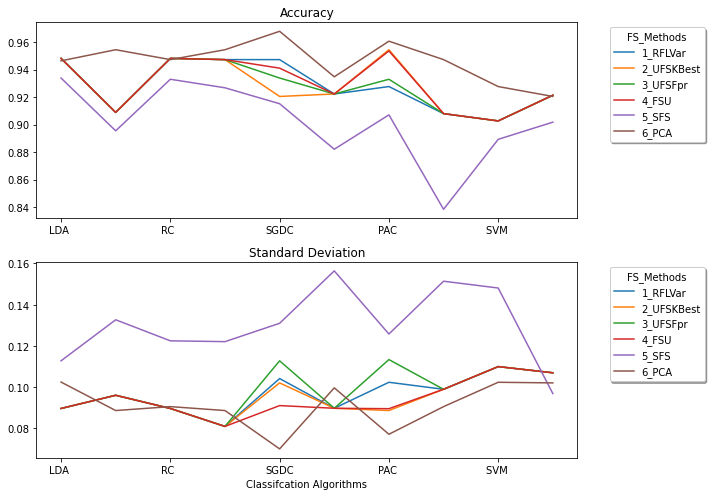

In [168]:
plt.figure(figsize=(10,7))
ax = plt.subplot(211)
classification_comparison.xs('Acc', axis=1, level='values').plot( ax=ax)
plt.title("Accuracy")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
ax = plt.subplot(212)
classification_comparison.xs('SD', axis=1, level='values').plot( ax=ax)
plt.title("Standard Deviation")
plt.xlabel("Classifcation Algorithms")
plt.legend(shadow=True, frameon=True, fancybox=True, title='FS_Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

In [169]:
classification_comparison.T.max()

LDA    0.95
LR     0.95
RC     0.95
LSVC   0.95
SGDC   0.97
P      0.93
PAC    0.96
NC     0.95
SVM    0.93
XGB    0.92
dtype: float64

In [172]:
classification_comparison.T['SGDC']

FS_Methods  values
1_RFLVar    Acc      0.95
            SD       0.10
2_UFSKBest  Acc      0.92
            SD       0.10
3_UFSFpr    Acc      0.93
            SD       0.11
4_FSU       Acc      0.94
            SD       0.09
5_SFS       Acc      0.92
            SD       0.13
6_PCA       Acc      0.97
            SD       0.07
Name: SGDC, dtype: float64

The max accuracy was by using PCA

##  Selected Feature

In [175]:
all_inputs = df.dropna()[df.columns[0:-1]].values
all_labels = df.dropna()[7].values

In [176]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(all_inputs)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [177]:
all_inputs = pca.transform(all_inputs)
all_inputs.shape

(210, 5)

In [185]:
new_df=pd.DataFrame(all_inputs)
new_df['class']=df[7]
df= new_df

# Step 5:  Building the classifier

## SGDC Linear Discriminant Analysis Confusion Matrix 

In [187]:
all_inputs = df.dropna()[df.columns[:-1]].values
all_labels = df.dropna()['class'].values
all_inputs.shape

(210, 5)

In [189]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
cls = SGDClassifier()
cls.fit(X_train,y_train)
y_pred = cls.predict(X_test)
print("------- Accuracy --------\n")
print(accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print("------- Confusion Matrix --------\n")
print(confusion_matrix(y_test,y_pred))
print("------- Classifcation Report-------- \n")
print(classification_report(y_test,y_pred))
print('--------------------------------------------------------')

------- Accuracy --------

0.9811320754716981
--------------------------------------------------------
------- Confusion Matrix --------

[[19  0  1]
 [ 0 15  0]
 [ 0  0 18]]
------- Classifcation Report-------- 

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        15
           3       0.95      1.00      0.97        18

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53

--------------------------------------------------------


# Step 6:  Reproducibility

In [190]:
!pip install watermark

In [191]:
%load_ext watermark

In [192]:
%watermark -a 'Hazim' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

Hazim Wed Jan 27 2021 

CPython 3.6.9
IPython 5.5.0

numpy 1.19.5
pandas 1.1.5
sklearn 0.0
matplotlib 3.2.2
seaborn 0.11.1

compiler   : GCC 8.4.0
system     : Linux
release    : 4.19.112+
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit
